## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

## Importing data from .csv file

In [2]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv('Iris_data.csv', names = columns )
df.head()
df.tail()
df.shape

(150, 5)

# Exploratory Data Analysis (EDA)
***
### Histogram of petal length

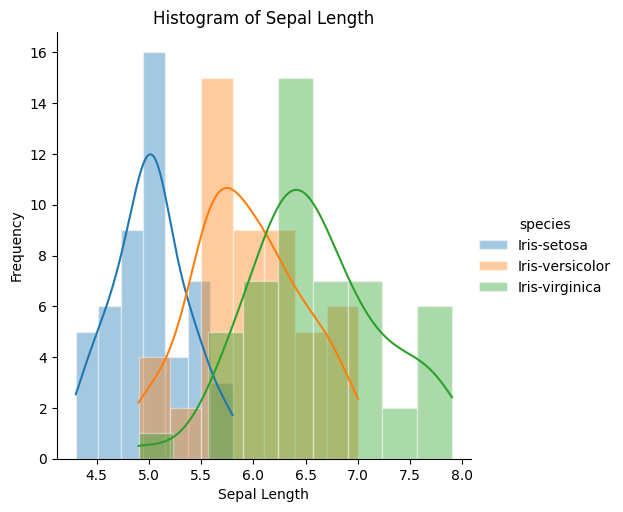

In [3]:
sns.FacetGrid(df, hue='species', height=5)\
    .map(sns.histplot, 'sepal_length', kde=True, alpha=.4, edgecolor=(1, 1, 1, .4),).add_legend()
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.show()

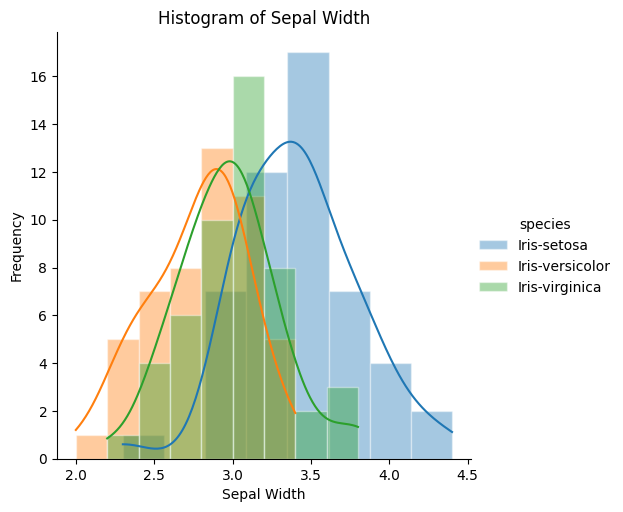

In [4]:
sns.FacetGrid(df, hue='species', height=5)\
    .map(sns.histplot, 'sepal_width', kde=True, alpha=.4, edgecolor=(1, 1, 1, .4),).add_legend()
plt.title('Histogram of Sepal Width')
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')
plt.show()

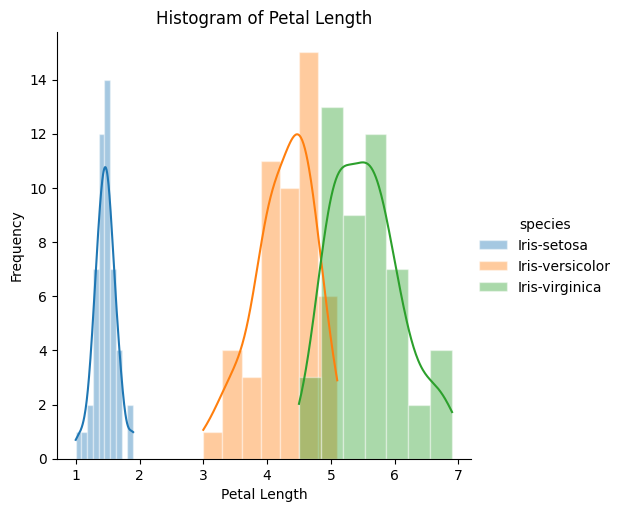

In [5]:
sns.FacetGrid(df, hue='species', height=5)\
    .map(sns.histplot, 'petal_length', kde=True, alpha=.4, edgecolor=(1, 1, 1, .4),).add_legend()
plt.title('Histogram of Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.show()

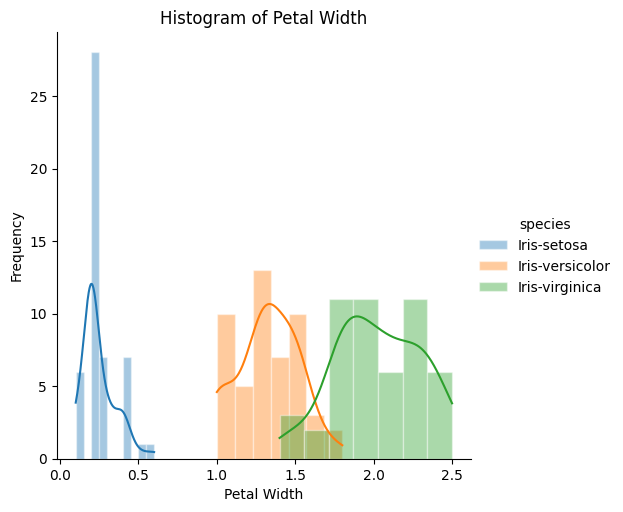

In [6]:
sns.FacetGrid(df, hue='species', height=5)\
    .map(sns.histplot, 'petal_width', kde=True, alpha=.4, edgecolor=(1, 1, 1, .4),).add_legend()
plt.title('Histogram of Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.show()

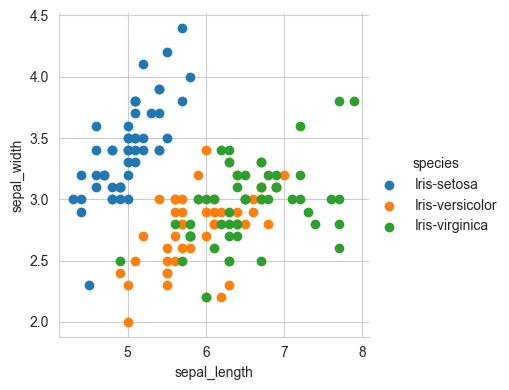

In [7]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="species", height=4) \
    .map(plt.scatter,"sepal_length","sepal_width") \
    .add_legend()
plt.show()

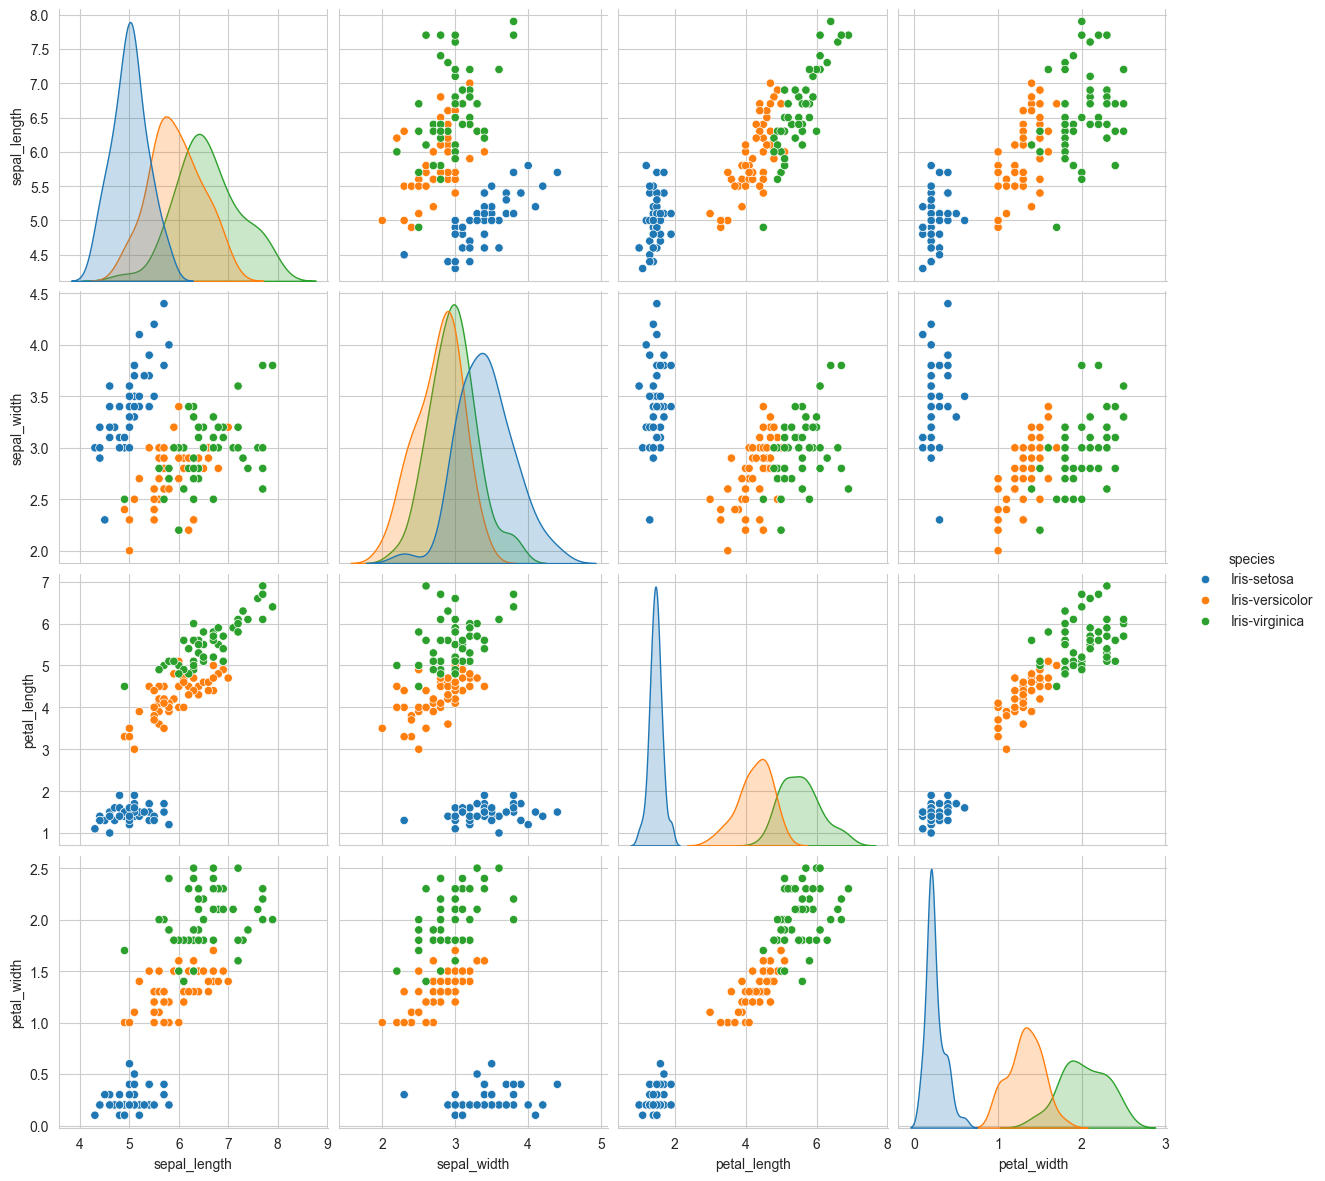

In [8]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="species",height=3,aspect=1)
plt.show()

In [9]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
label_encoder = preprocessing.LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

df['species'].unique()

array([0, 1, 2])

In [14]:
x = df.drop('species', axis=1)
y = df['species']

x = df.iloc[:, [0,1]].values
y = df.iloc[:, 4].values

len(x), len(y)

(150, 150)

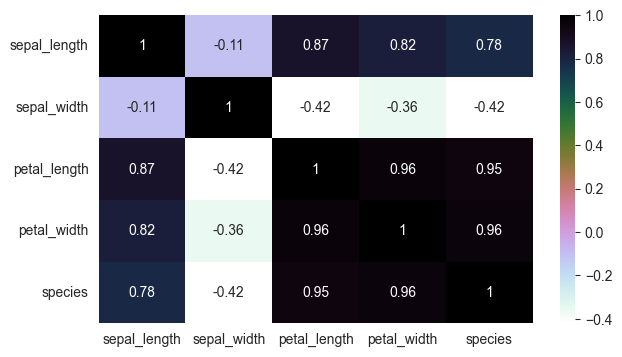

In [15]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 2)

In [17]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [18]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  1,  1],
       [ 0,  9,  6],
       [ 0,  4,  9]])

/var/folders/7w/846qc9yj1yl9_3gczch751xm0000gn/T/ipykernel_64782/4133020138.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


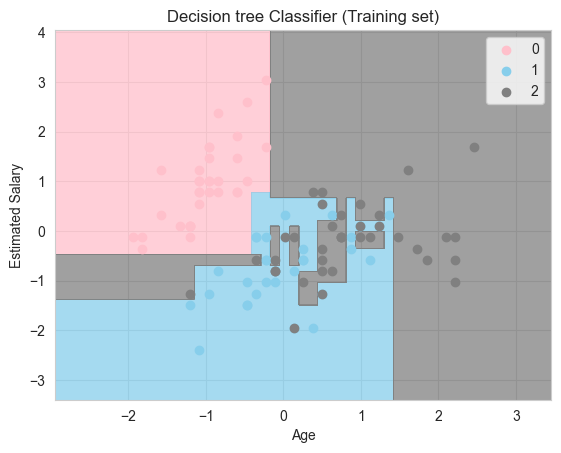

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink','skyblue','gray')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('pink', 'skyblue','gray'))(i), label = j)
plt.title('Decision tree Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

/var/folders/7w/846qc9yj1yl9_3gczch751xm0000gn/T/ipykernel_64782/474813364.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


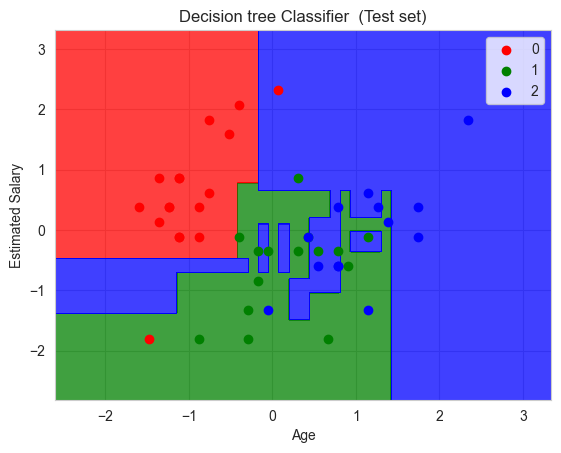

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Decision tree Classifier  (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
print('The accuracy of the Decision Tree Classifier is : %.2f'%accuracy_score(y_pred,y_test))
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, y_pred))

The accuracy of the Decision Tree Classifier is : 0.73
RMSE value = 0.58
R2 Score= 0.49


In [24]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.88      0.94        17\n           1       0.64      0.60      0.62        15\n           2       0.56      0.69      0.62        13\n\n    accuracy                           0.73        45\n   macro avg       0.74      0.72      0.73        45\nweighted avg       0.75      0.73      0.74        45\n'

In [25]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors=3)

In [26]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
#for checking the model accuracy
print('The accuracy of the KNN is',accuracy_score(y_pred,y_test))
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, y_pred))

The accuracy of the KNN is 0.7333333333333333
RMSE value = 0.58
R2 Score= 0.49


In [31]:
from sklearn import svm
svc = svm.SVC(C=1.0, kernel='rbf')

In [32]:
svc.fit(X_train,y_train)

SVC()

In [33]:
pred = svc.predict(X_test)

In [34]:
print('The accuracy of the SVM is: %.2f'%accuracy_score(pred,y_test))
rmse = sqrt(mean_squared_error(y_test, pred))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, pred))

The accuracy of the SVM is: 0.80
RMSE value = 0.45
R2 Score= 0.70


In [35]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model = LogisticRegression()
model.fit(X_train,y_train) 
prediction=model.predict(X_test)

In [ ]:
print('The accuracy of the Logistic Regression using Petals is:',accuracy_score(prediction,y_test))
rmse = sqrt(mean_squared_error(y_test, prediction))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, prediction))

The accuracy of the Logistic Regression using Petals is: 0.8222222222222222
RMSE value = 0.42
R2 Score= 0.73
